In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [33]:
books_df = pd.read_csv(f"{path}/books.csv")

In [34]:
books_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


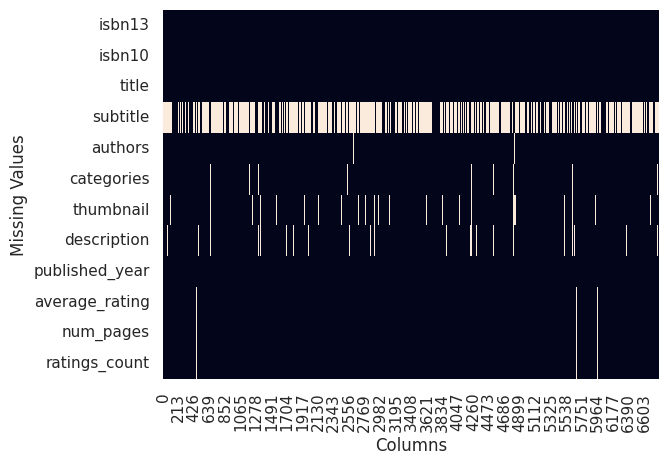

In [35]:
axes = plt.axes()
sns.heatmap(books_df.isna().transpose(), cbar = False, ax = axes)

plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()

In [36]:
books_df["missing_description"] = np.where(books_df["description"].isna(), 1, 0)
books_df["age_of_book"] = 2024 - books_df["published_year"]

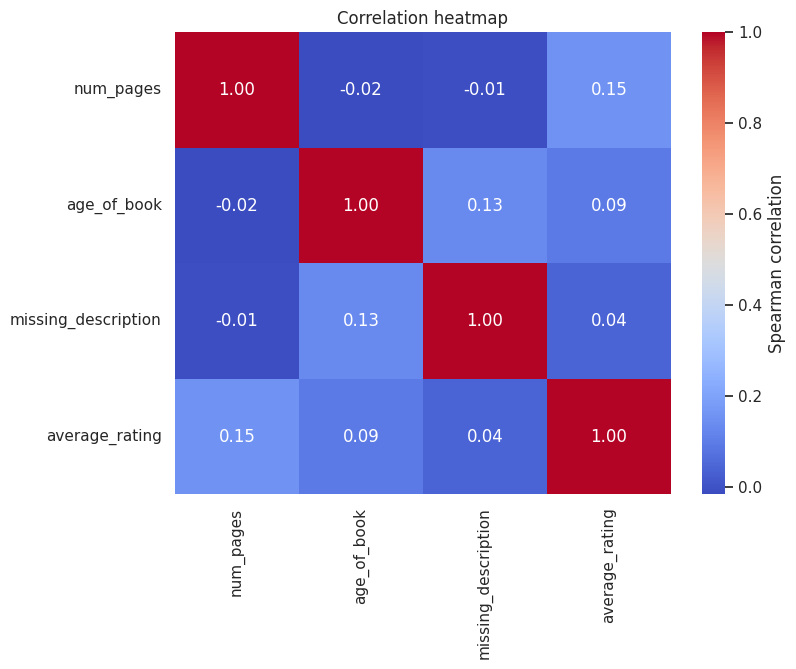

In [37]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books_df[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm",
                      cbar_kws = {"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [38]:
books_missing = books_df[~(books_df["description"].isna()) &
      ~(books_df["num_pages"].isna()) &
      ~(books_df["average_rating"].isna()) &
      ~(books_df["published_year"].isna())
]

In [39]:
print(books_missing.shape)
books_missing.head()

(6507, 14)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0


In [40]:
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending = False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [41]:
books_missing["words_in_description"] = books_missing["description"].str.split().str.len()

In [42]:
books_missing.loc[books_missing["words_in_description"].between(1, 4), "description"]

,description
6,Donation.
11,Fantasy-roman.
748,Includes bibliographical references.
770,Bound For Oregon (PB)
775,No Marketing Blurb
812,No Marketing Blurb
857,First published in 1813.
944,Edited by Maurice Hindle.
953,DEFOE/ROBINSON CRUSOE (BC)
954,Edited by John Carey.


In [43]:
books_missing.loc[books_missing["words_in_description"].between(5, 14), "description"]

,description
2,Volume Two of Stephen Donaldson's acclaimed se...
38,Koko is Peter Straub's foray into the psycholo...
70,A matter of life and death - and the Throne of...
77,Nonsense rhyming story. 4 yrs+
84,A study guide for the novel There's a Boy in t...
...,...
6715,The first comprehensive guide to addressing Na...
6726,Presents two complete novels from Henry James.
6757,Audio Book- unabriged on CD
6776,Raymond Chandler meets The Exorcist. Classic n...


In [44]:
books_missing.loc[books_missing["words_in_description"].between(15, 24), "description"]

,description
10,One of Sidney Sheldon's most popular and bests...
32,Tells the story of three generations of Chines...
36,A magical and fantastic collection of early st...
57,A young drifter finds more than he bargained f...
68,A new 'The Doors of Perception' for the 21st c...
...,...
6767,Everything from the fingerprints of the gods t...
6782,Displays one of America's leading physicist's ...
6783,Basics Illustration 01: Thinking Visually expl...
6789,Provides an introduction to the American artis...


In [45]:
books_missing.loc[books_missing["words_in_description"].between(25, 34), "description"]

,description
9,Kate Blackwell is an enigma and one of the mos...
14,"Available in the U.S. for the first time, this..."
20,"It is 1937, and Charles Ashworth, a Canon to t..."
21,Reissue of the author's most famous and well-l...
46,No one believes a little girl when she insists...
...,...
6760,"Joel, an English teacher, has never really lik..."
6766,Discusses the historical and intellectual back...
6775,Presents nearly one thousand recipes--from app...
6779,Edited by the creator and executive producer o...


In [46]:
book_missing_25_words = books_missing[books_missing["words_in_description"] >= 25]

In [47]:
book_missing_25_words["title_and_subtitle"] = (
    np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],
             book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

In [48]:
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [49]:
(
    book_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index = False)
)